In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import probplot, genextreme, genpareto
from sklearn.model_selection import KFold
import scipy.stats as stats


url= os.path.join(os.getcwd(), "data", "Base_Prueba.xlsx")
data = pd.read_excel(url, sheet_name="Sheet1")
data=data[['Edad','Ingresos','Gastos','Ahorros','Puntaje_Crediticio']]

1. Preparacion de datos 


In [13]:
## Preparacion datos 
data['Edad'] = data['Edad'].astype('int')
data['Ingresos'] = data['Ingresos'].astype('int')
data['Gastos'] = data['Gastos'].astype('int')
data['Ahorros'] = data['Ahorros'].astype('int')
data['Puntaje_Crediticio'] = data['Puntaje_Crediticio'].astype('int')
# Seleccionar las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns

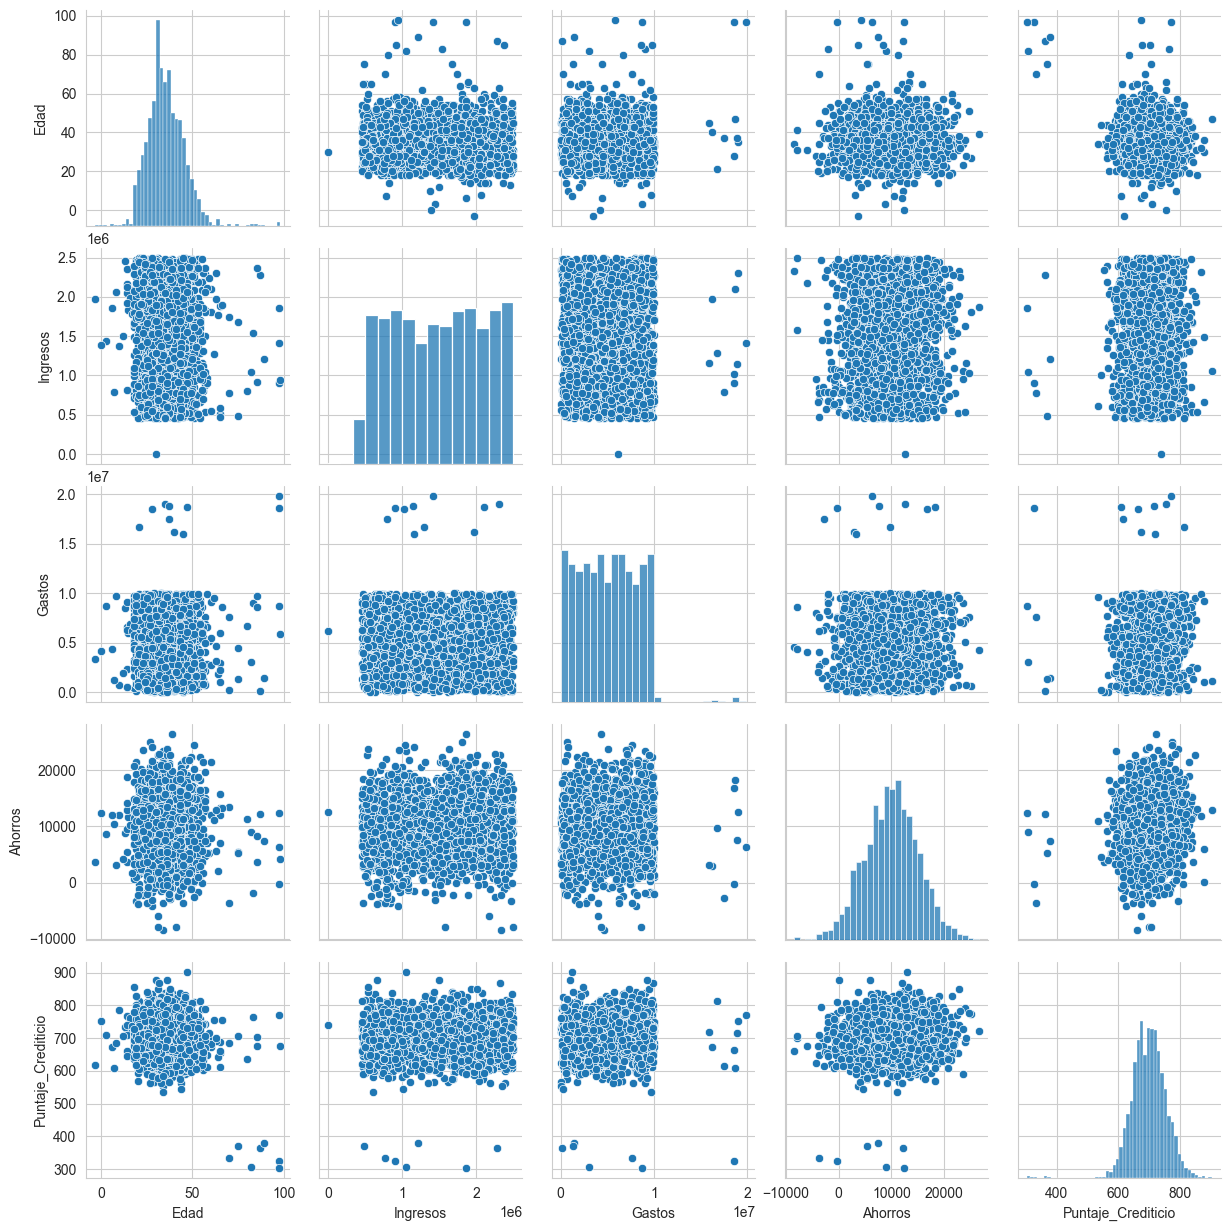

In [14]:
import seaborn as sns
sns.pairplot(data)

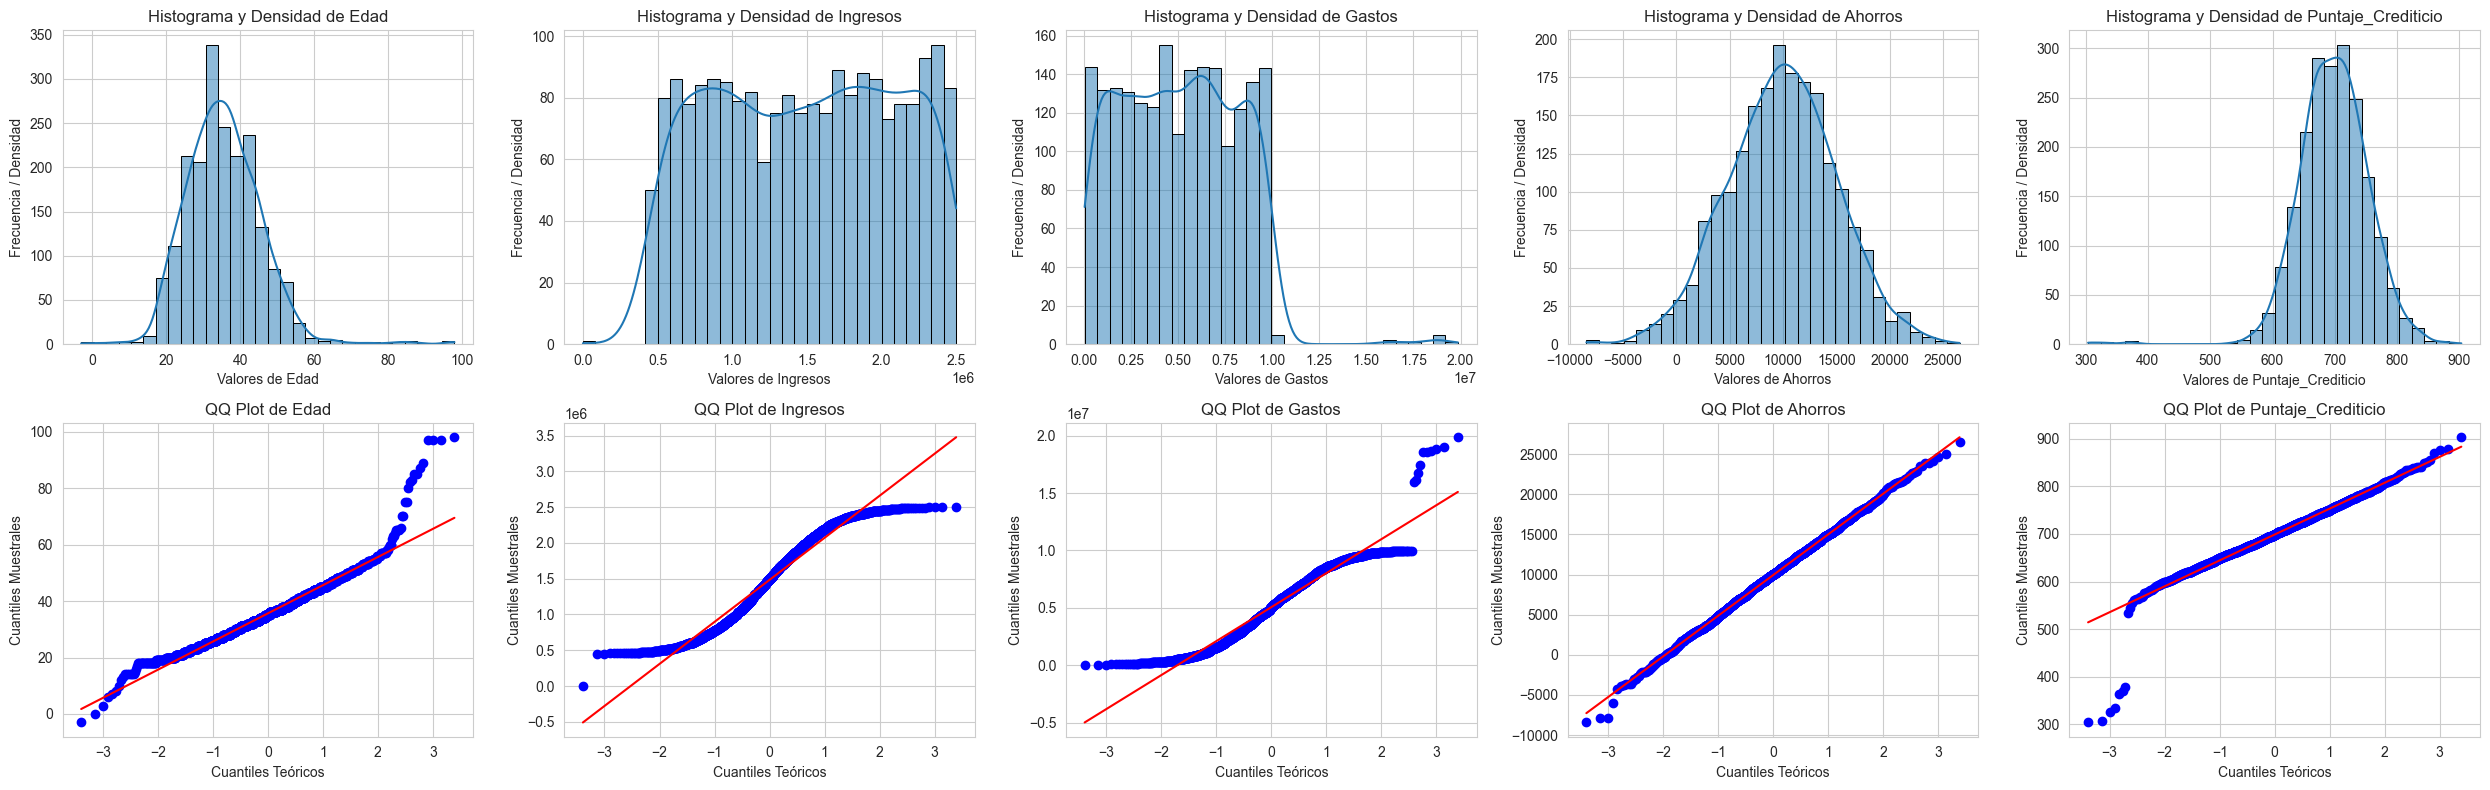

In [15]:

# Crear una figura con 2 filas: la primera para histogramas y la segunda para QQ plots
fig, axes = plt.subplots(2, len(numeric_columns), figsize=(5 * len(numeric_columns), 8))

# Primera fila: Histogramas y densidad
for i, column in enumerate(numeric_columns):
    sns.histplot(data[column].values, kde=True, ax=axes[0, i], bins=30, edgecolor="black")
    axes[0, i].set_title(f"Histograma y Densidad de {column}")
    axes[0, i].set_xlabel(f"Valores de {column}")
    axes[0, i].set_ylabel("Frecuencia / Densidad")

# Segunda fila: QQ Plots
for i, column in enumerate(numeric_columns):
    stats.probplot(data[column], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"QQ Plot de {column}")
    axes[1, i].set_xlabel("Cuantiles Teóricos")
    axes[1, i].set_ylabel("Cuantiles Muestrales")
plt.tight_layout()
plt.show()

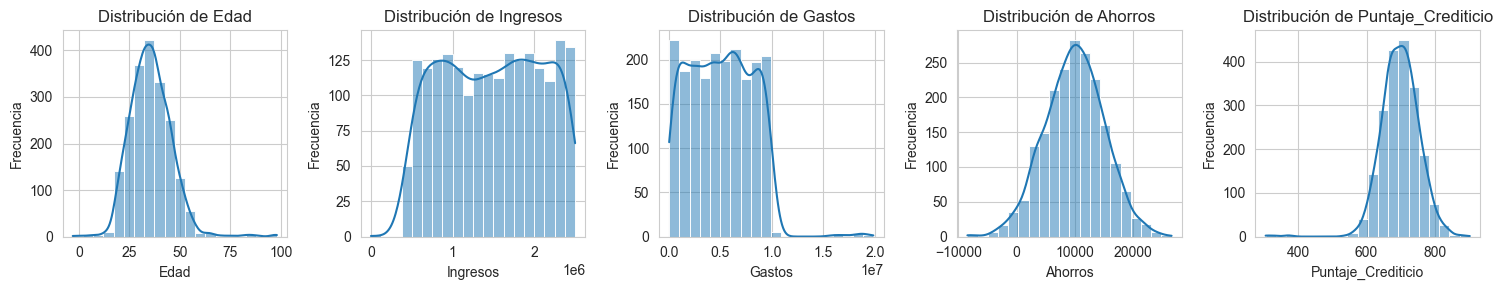

In [16]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,3))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f"Distribución de {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frecuencia")
for j in range(i + 1, len(axes)):  # i es el último índice utilizado
    fig.delaxes(axes[j])  # Elimina los ejes sobrantes
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Función para generar un DataFrame descriptivo con todos los indicadores
def generate_summary_dataframe(data):
    summary_df = pd.DataFrame({
       # 'Tipo de Dato': data.dtypes,
      #  'Valores Únicos': data.nunique(),
        'Valores Nulos': data.isnull().sum(),
        'Valores No Nulos': data.notnull().sum(),
        'Media': np.round(data.mean(numeric_only=True),2),
        'Mediana': np.round(data.median(numeric_only=True),2),
        'Desviación Estándar': np.round(data.std(numeric_only=True),2),
        'Min': data.min(numeric_only=True),
        'Max': data.max(numeric_only=True),
        'Rango': data.max(numeric_only=True) - data.min(numeric_only=True),
        'Q1 (25%)': data.quantile(0.25, numeric_only=True),
        'Q3 (75%)': data.quantile(0.75, numeric_only=True),
       # 'IQR': data.quantile(0.75, numeric_only=True) - data.quantile(0.25, numeric_only=True),
      #  'Duplicados': data.duplicated().sum()
    })
    return summary_df

# Generar el resumen del dataset
summary_dataframe = generate_summary_dataframe(data)

summary_dataframe

,Valores Nulos,Valores No Nulos,Media,Mediana,Desviación Estándar,Min,Max,Rango,Q1 (25%),Q3 (75%)
Edad,0,2000,35.61,35.0,10.21,-3,98,101,29.00,42.00
Ingresos,0,2000,1483677.86,1498563.5,601360.95,30,2498536,2498506,949579.25,2000147.25
Gastos,0,2000,5058003.88,5043047.5,3028909.62,53018,19860467,19807449,2513550.75,7467555.00
Ahorros,0,2000,9921.72,10017.0,5062.29,-8427,26558,34985,6613.75,13310.00
Puntaje_Crediticio,0,2000,698.74,698.0,55.63,304,903,599,664.00,734.00


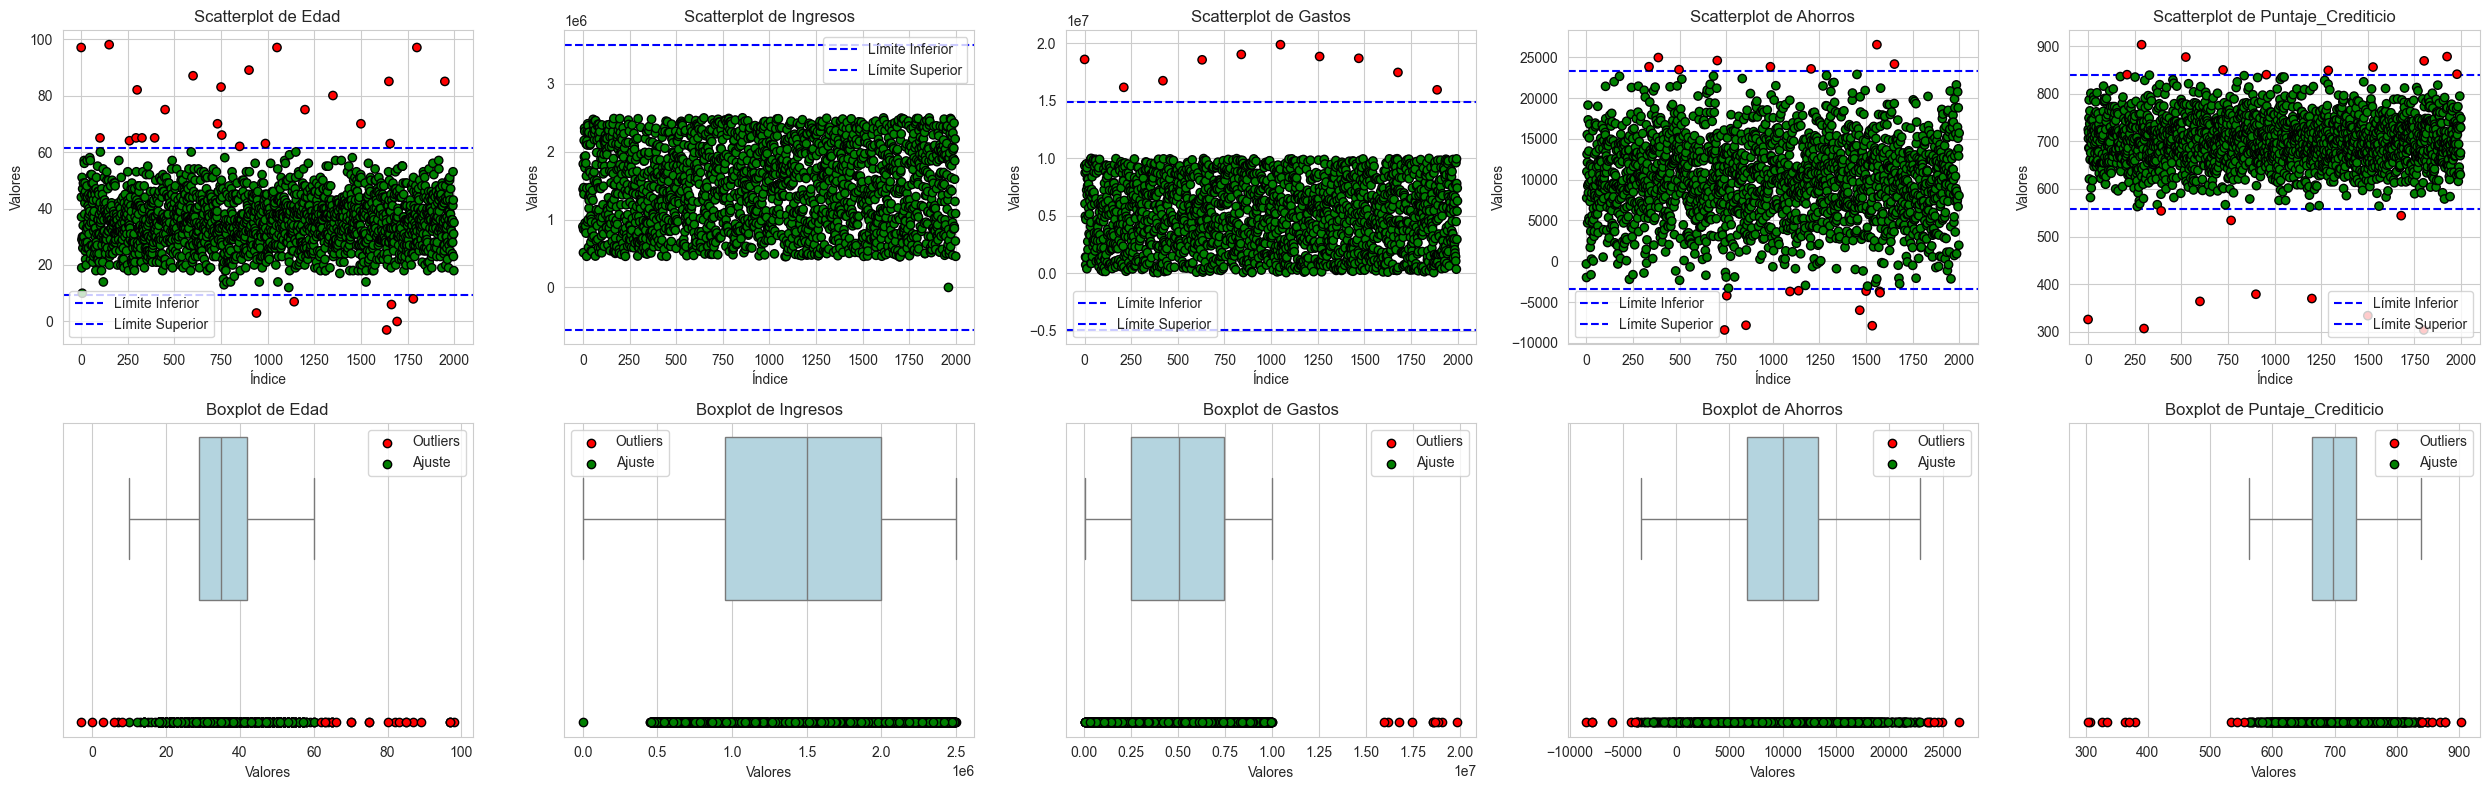

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura para los gráficos
fig, axes = plt.subplots(2, len(numeric_columns), figsize=(5 * len(numeric_columns), 8))

# Primera fila: Scatterplot por variable con outliers marcados en rojo
for i, column in enumerate(numeric_columns):
    c_data = data[column].dropna()  # Eliminar valores nulos
    Q1 = np.percentile(c_data, 25)
    Q3 = np.percentile(c_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (c_data < lower_bound) | (c_data > upper_bound)

    # Scatterplot con línea delimitadora
    axes[0, i].scatter(range(len(c_data)), c_data, color=['red' if o else 'green' for o in outliers], edgecolors='black', zorder=2)
    axes[0, i].axhline(y=lower_bound, color='blue', linestyle='--', label='Límite Inferior', zorder=1)
    axes[0, i].axhline(y=upper_bound, color='blue', linestyle='--', label='Límite Superior', zorder=1)
    axes[0, i].set_title(f"Scatterplot de {column}")
    axes[0, i].set_xlabel("Índice")
    axes[0, i].set_ylabel("Valores")
    axes[0, i].legend()

# Segunda fila: Boxplot con outliers y valores
for i, column in enumerate(numeric_columns):
    c_data = data[column].dropna()
    Q1 = np.percentile(c_data, 25)
    Q3 = np.percentile(c_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (c_data < lower_bound) | (c_data > upper_bound)
    filtered_data = c_data[~outliers]

    sns.boxplot(x=c_data, ax=axes[1, i], color='lightblue', fliersize=0)
    axes[1, i].scatter(c_data[outliers], [1] * np.sum(outliers), color='red', edgecolors='black', label='Outliers', zorder=3)
    axes[1, i].scatter(filtered_data, [1] * len(filtered_data), color='green', edgecolors='black', label='Ajuste', zorder=2)
    axes[1, i].set_title(f"Boxplot de {column}")
    axes[1, i].set_xlabel("Valores")
    axes[1, i].legend()

plt.tight_layout()
plt.show()

In [19]:

df_replaced = data.copy()
for column in numeric_columns:
    c_data = df_replaced[column].dropna()  # Eliminar valores nulos
    Q1 = np.percentile(c_data, 25)
    Q3 = np.percentile(c_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = c_data[(c_data >= lower_bound) & (c_data <= upper_bound)].mean()
    df_replaced[column] = np.where((df_replaced[column] < lower_bound) | (df_replaced[column] > upper_bound), mean_value, df_replaced[column])


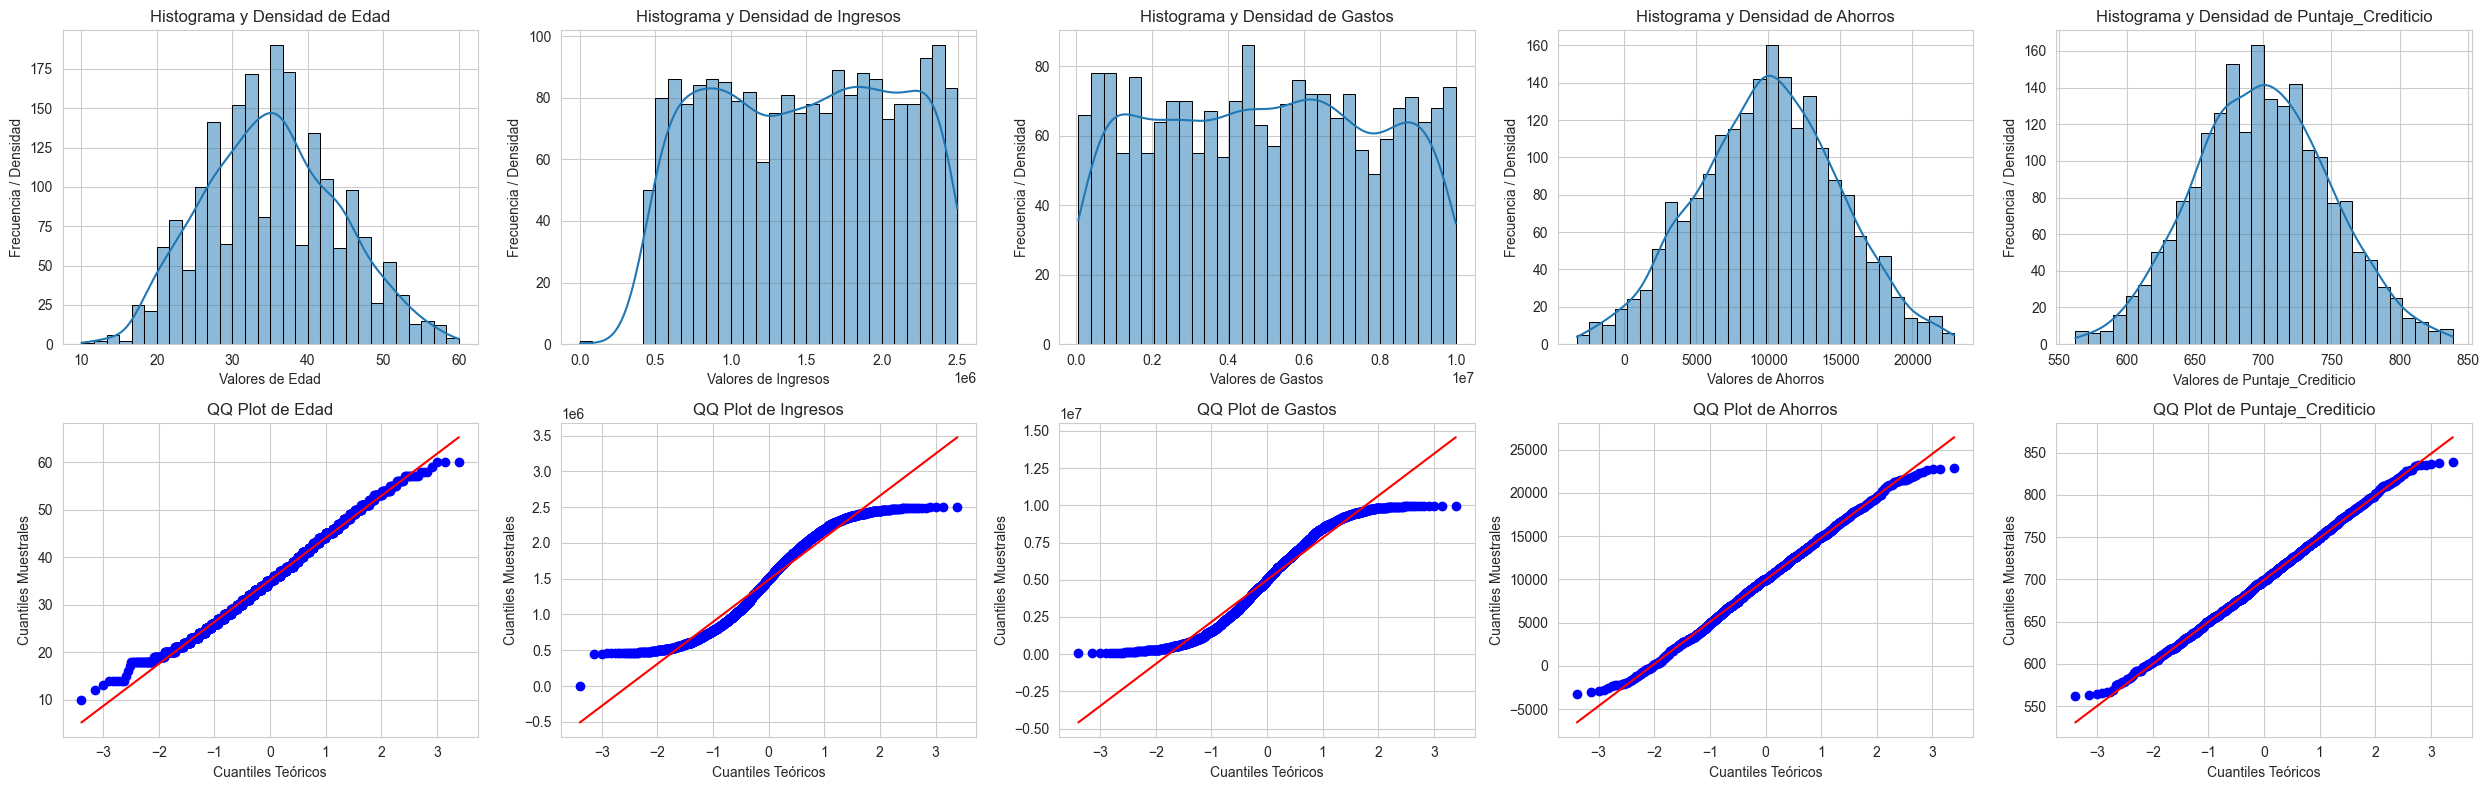

In [20]:

df_replaced = data.copy()
for column in numeric_columns:
    c_data = df_replaced[column].dropna()  # Eliminar valores nulos
    Q1 = np.percentile(c_data, 25)
    Q3 = np.percentile(c_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = c_data[(c_data >= lower_bound) & (c_data <= upper_bound)].mean()
    df_replaced[column] = np.where((df_replaced[column] < lower_bound) | (df_replaced[column] > upper_bound), mean_value, df_replaced[column])

fig, axes = plt.subplots(2, len(numeric_columns), figsize=(5 * len(numeric_columns), 8))

# Primera fila: Histogramas y densidad
for i, column in enumerate(numeric_columns):
    sns.histplot(df_replaced[column].values, kde=True, ax=axes[0, i], bins=30, edgecolor="black")
    axes[0, i].set_title(f"Histograma y Densidad de {column}")
    axes[0, i].set_xlabel(f"Valores de {column}")
    axes[0, i].set_ylabel("Frecuencia / Densidad")

# Segunda fila: QQ Plots
for i, column in enumerate(numeric_columns):
    stats.probplot(df_replaced[column], dist="norm", plot=axes[1, i])
    axes[1, i].set_title(f"QQ Plot de {column}")
    axes[1, i].set_xlabel("Cuantiles Teóricos")
    axes[1, i].set_ylabel("Cuantiles Muestrales")
plt.tight_layout()
plt.show()

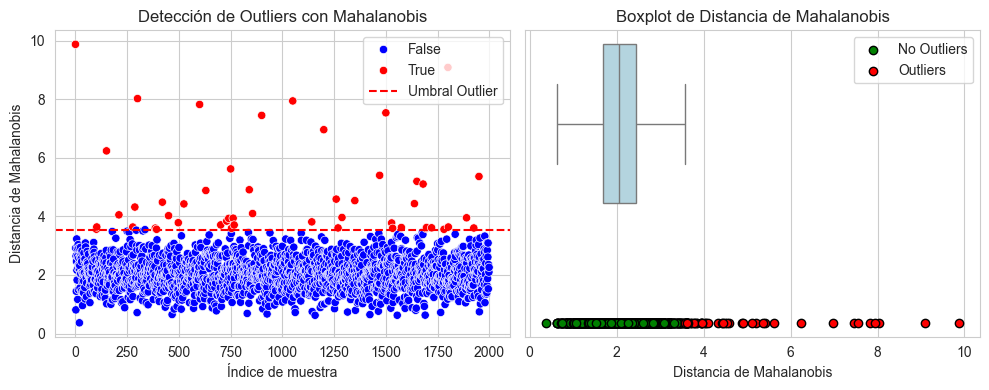

In [21]:
def mahalanobis_distance(df):
    mean = np.mean(df, axis=0)
    cov_matrix = np.cov(df, rowvar=False)
    inv_cov_matrix = np.linalg.pinv(cov_matrix)  
    diff = df - mean
    mahalanobis_dist = np.sqrt(np.sum(diff @ inv_cov_matrix * diff, axis=1))
    return mahalanobis_dist
numeric_data = data.select_dtypes(include=[np.number])
data['Mahalanobis'] = mahalanobis_distance(numeric_data.values)
threshold = np.percentile(data['Mahalanobis'], 97.5)
outliers = data['Mahalanobis'] > threshold
fig, axes = plt.subplots(1, 2, figsize=(10,4 ))
sns.scatterplot(x=data.index, y=data['Mahalanobis'], hue=outliers, palette={False: 'blue', True: 'red'}, ax=axes[0])
axes[0].axhline(y=threshold, color='red', linestyle='--', label='Umbral Outlier')
axes[0].legend()
axes[0].set_title("Detección de Outliers con Mahalanobis")
axes[0].set_xlabel("Índice de muestra")
axes[0].set_ylabel("Distancia de Mahalanobis")
sns.boxplot(x=data['Mahalanobis'], ax=axes[1], color='lightblue', fliersize=0)
axes[1].scatter(data['Mahalanobis'][~outliers], [1] * sum(~outliers), color='green', edgecolors='black', label='No Outliers', zorder=2)
axes[1].scatter(data['Mahalanobis'][outliers], [1] * sum(outliers), color='red', edgecolors='black', label='Outliers', zorder=3)
axes[1].legend()
axes[1].set_title("Boxplot de Distancia de Mahalanobis")
axes[1].set_xlabel("Distancia de Mahalanobis")
plt.tight_layout()
plt.show()

data.drop(columns=['Mahalanobis'],errors='ignore',inplace=True)

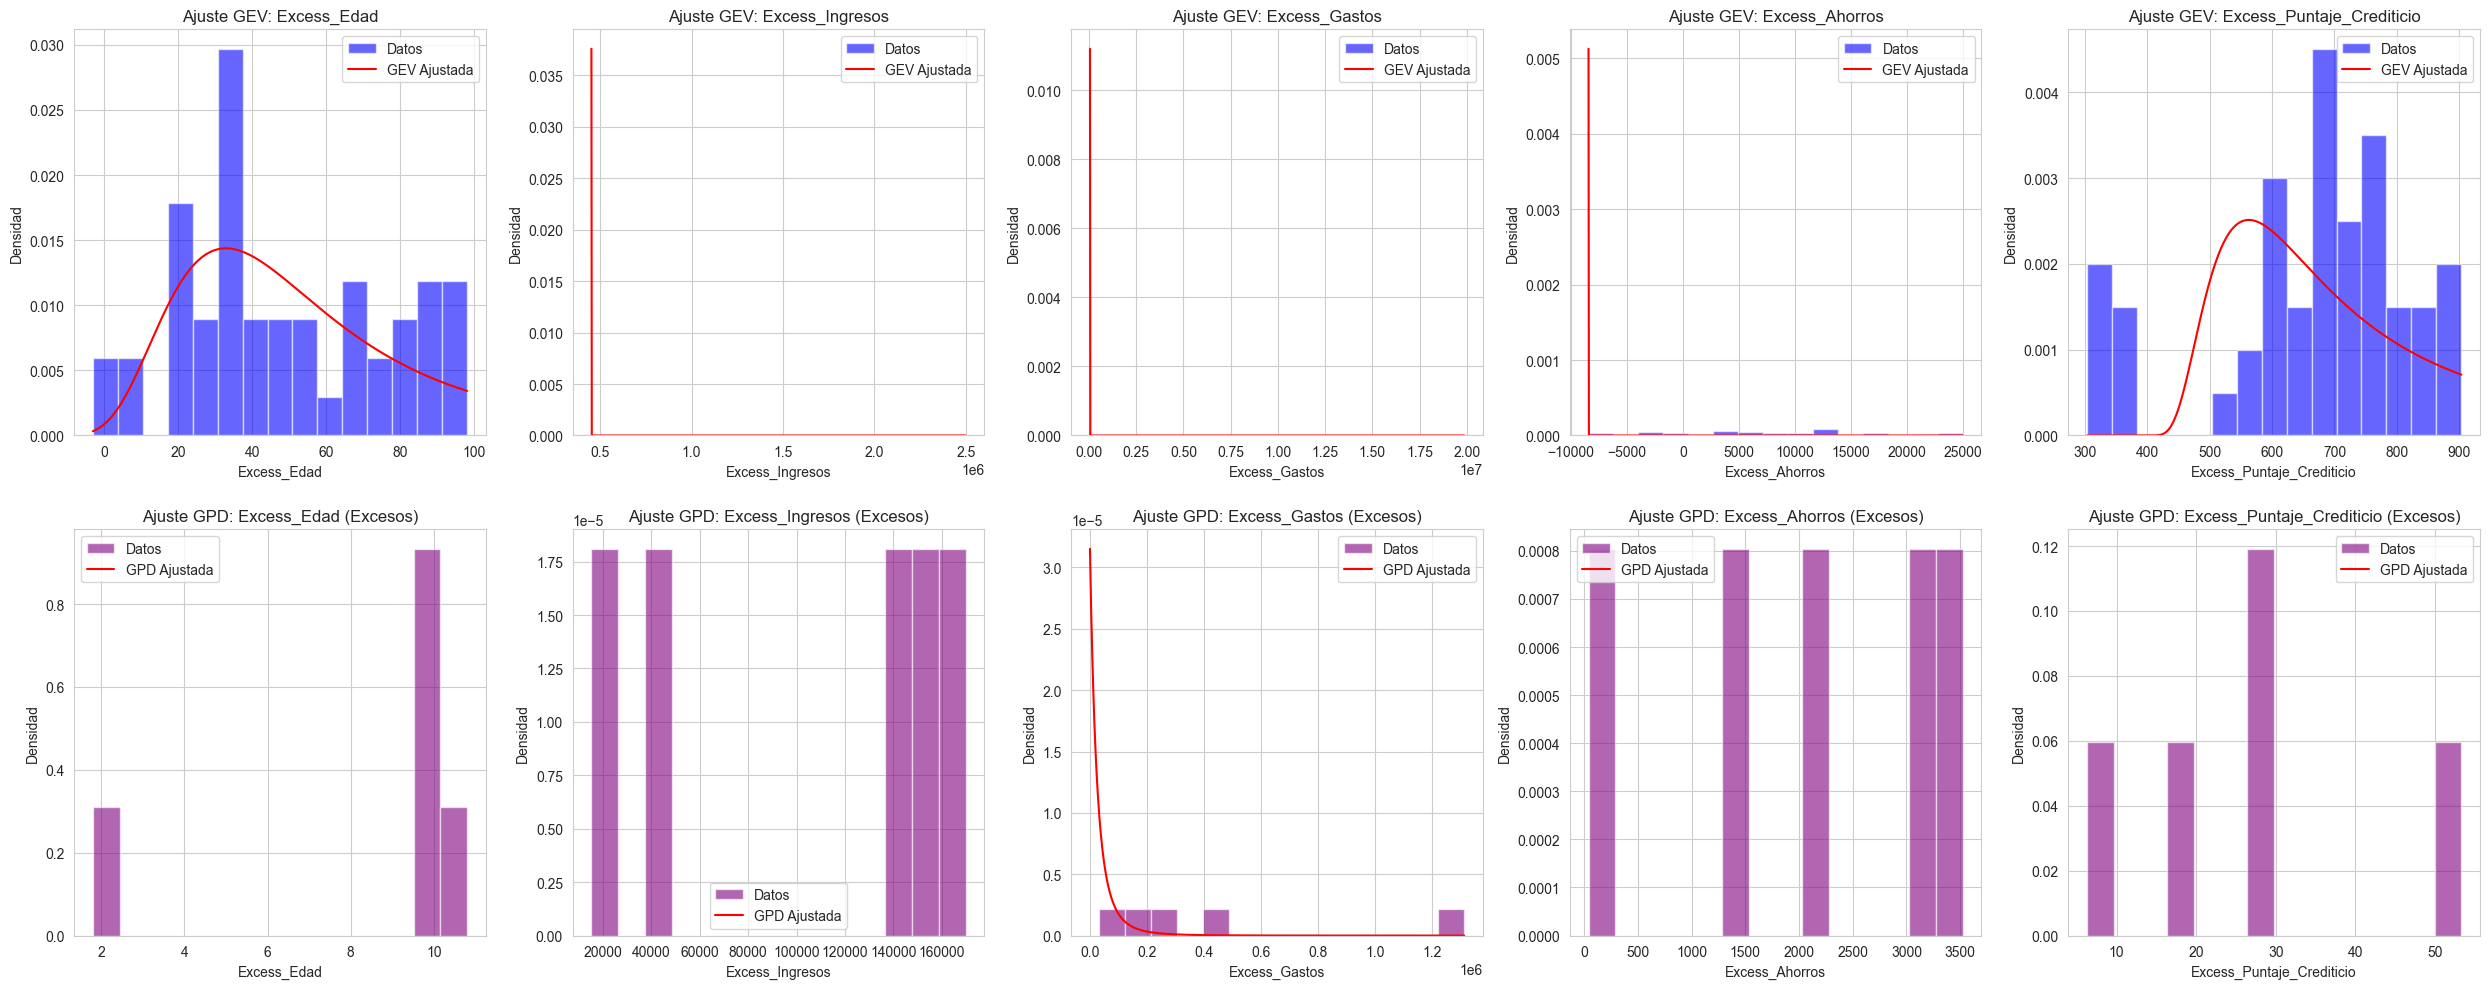

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import genextreme, genpareto

def fit_distributions(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    gev_params_list = []
    gpd_params_list = []
    fig, axes = plt.subplots(2, len(numeric_columns), figsize=(5 * len(numeric_columns), 10))
    for i, column in enumerate(numeric_columns):
        data_col = df[column].dropna()
        gev_params = genextreme.fit(data_col)
        gev_mu = gev_params[1]
        gev_sigma = gev_params[2]
        gev_xi = -gev_params[0]
        gev_params_list.append([column, gev_mu, gev_sigma, gev_xi])
        threshold = np.percentile(data_col, 90)
        excess_data = data_col[data_col > threshold] - threshold
        gpd_params = genpareto.fit(excess_data, loc=0)
        gpd_sigma = gpd_params[1]
        gpd_xi = gpd_params[0]
        gpd_params_list.append([column, gpd_sigma, gpd_xi])
        x_gev = np.linspace(data_col.min(), data_col.max(), 1000)
        pdf_gev = genextreme.pdf(x_gev, -gev_params[0], loc=gev_params[1], scale=gev_params[2])
        x_gpd = np.linspace(0, excess_data.max(), 1000)
        pdf_gpd = genpareto.pdf(x_gpd, gpd_params[0], loc=0, scale=gpd_params[1])

        # Gráfico GEV en la primera fila
        axes[0, i].hist(data_col, bins=15, density=True, alpha=0.6, color='blue', label='Datos')
        axes[0, i].plot(x_gev, pdf_gev, 'r-', label='GEV Ajustada')
        axes[0, i].set_title(f'Ajuste GEV: {column}')
        axes[0, i].set_xlabel(column)
        axes[0, i].set_ylabel('Densidad')
        axes[0, i].legend()

        # Gráfico GPD en la segunda fila
        axes[1, i].hist(excess_data, bins=14, density=True, alpha=0.6, color='purple', label='Datos')
        axes[1, i].plot(x_gpd, pdf_gpd, 'r-', label='GPD Ajustada')
        axes[1, i].set_title(f'Ajuste GPD: {column} (Excesos)')
        axes[1, i].set_xlabel(column)
        axes[1, i].set_ylabel('Densidad')
        axes[1, i].legend()
    plt.tight_layout()
    plt.show()
    gev_df = pd.DataFrame(gev_params_list, columns=['Variable', 'μ (loc)', 'σ (scale)', 'ξ (shape)'])
    gpd_df = pd.DataFrame(gpd_params_list, columns=['Variable', 'σ (scale)', 'ξ (shape)'])
    return gev_df, gpd_df

# Generar datos de ejemplo
extremos = data[outliers]
extremos.columns = ["Excess_" + i for i in extremos.columns]

# Ajustar distribuciones y mostrar resultados
gev_results, gpd_results = fit_distributions(extremos)


In [26]:
gev_results

,Variable,μ (loc),σ (scale),ξ (shape)
0,Excess_Edad,38.387651,26.278494,-0.238631
1,Excess_Ingresos,452406.513989,4.880276,9.494897
2,Excess_Gastos,53019.465421,16.377433,11.175922
3,Excess_Ahorros,-8420.668955,35.589477,5.621322
4,Excess_Puntaje_Crediticio,634.185664,171.761312,-0.616193


In [27]:
gpd_results

,Variable,σ (scale),ξ (shape)
0,Excess_Edad,-0.014658,-1.856966
1,Excess_Ingresos,-1429.075248,-2.872429
2,Excess_Gastos,31727.699652,0.313300
3,Excess_Ahorros,-15.441989,-1.779295
4,Excess_Puntaje_Crediticio,-0.201577,-1.418642


/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1992228500.py:8: RuntimeWarning: divide by zero encountered in log
  hill_estimate = np.mean(np.log(excess_k / sorted_data[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1992228500.py:8: RuntimeWarning: divide by zero encountered in divide
  hill_estimate = np.mean(np.log(excess_k / sorted_data[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1992228500.py:8: RuntimeWarning: invalid value encountered in log
  hill_estimate = np.mean(np.log(excess_k / sorted_data[k]))


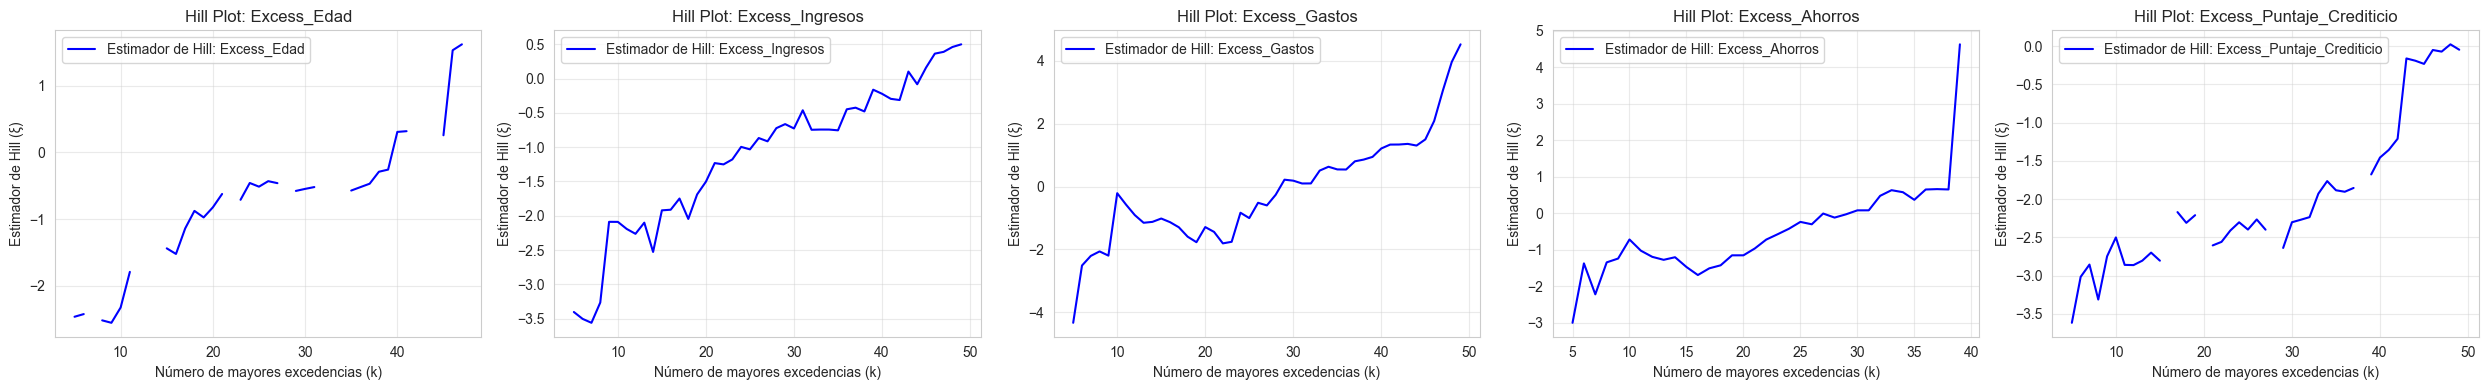

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hill_generalized(data, k):
    sorted_data = np.sort(data)[::-1]  # Ordenar en orden descendente
    excess_k = sorted_data[:k] - sorted_data[k]  # Excedencias sobre el umbral
    hill_estimate = np.mean(np.log(excess_k / sorted_data[k]))
    return hill_estimate

def generate_hill_plots(df, k_values=range(5, 50), k_representative=20):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    hill_results = []
    num_columns = 5
    num_rows = (len(numeric_columns) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 4 * num_rows))
    axes = axes.flatten()
    for i, column in enumerate(numeric_columns):
        data_col = df[column].dropna()
        if len(data_col) < max(k_values):
            print(f"{column}: No hay suficientes datos para calcular el estimador de Hill.")
            continue
        hill_values = [hill_generalized(data_col.values, k) for k in k_values]
        hill_val_representative = hill_generalized(data_col.values, k_representative)
        hill_results.append({'Variable': column, 'k': k_representative, 'Hill (ξ)': hill_val_representative})
        ax = axes[i]
        ax.plot(k_values, hill_values, label=f'Estimador de Hill: {column}', color='blue')
        ax.set_xlabel('Número de mayores excedencias (k)', fontsize=10)
        ax.set_ylabel('Estimador de Hill (ξ)', fontsize=10)
        ax.set_title(f'Hill Plot: {column}', fontsize=12)
        ax.grid(alpha=0.4)
        ax.legend(fontsize=10)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    hill_df = pd.DataFrame(hill_results)
    return hill_df


hill_results_df = generate_hill_plots(extremos)




NameError: name 'n_splits' is not defined

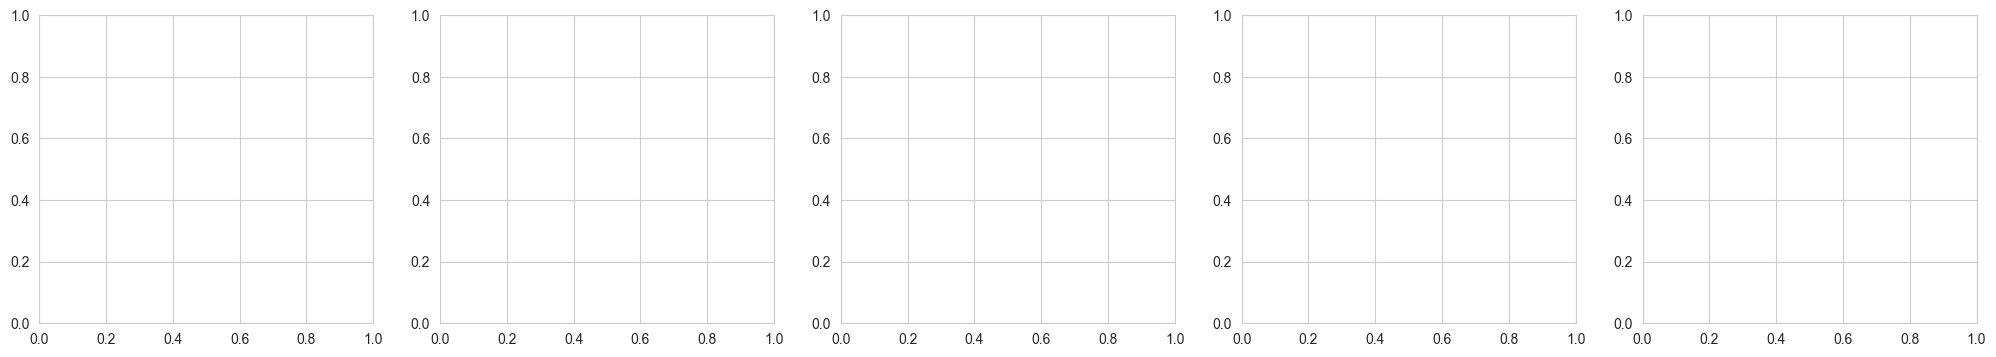

In [29]:

def hill_estimator(data, k):
    sorted_data = np.sort(data)[::-1]
    excess_k = sorted_data[:k] - sorted_data[k]  
    hill = np.mean(np.log(excess_k / sorted_data[k]))
    return hill
def cross_validate_hill(data, k_values, n_splits4):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    errors = []
    for k in k_values:
        fold_errors = []
        for train_index, test_index in kf.split(data):
            train_data = data[train_index]
            test_data = data[test_index]
            try:
                hill = hill_estimator(train_data, k)
                sorted_test = np.sort(test_data)[::-1]
                test_k = sorted_test[:k] - sorted_test[k]  # Excedencias en test
                if len(test_k) > 0:
                    predicted = np.mean(np.log(test_k / sorted_test[k]))
                    fold_errors.append(abs(hill - predicted))
            except:
                fold_errors.append(np.nan)  # Para manejar posibles errores numéricos
        errors.append(np.nanmean(fold_errors))  # Promedio de errores por k
    return errors
def hill_estimation_for_dataframe(df, k_values=range(2, 50), n_splits=3):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    results = []
    num_columns = 5
    num_rows = (len(numeric_columns) + num_columns - 1) // num_columns
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(5 * num_columns, 4 * num_rows))
    axes = axes.flatten()
    for i, column in enumerate(numeric_columns):
        data_col = df[column].dropna().values
        if len(data_col) < max(k_values):
            print(f"{column}: No hay suficientes datos para calcular el estimador de Hill.")
            continue
        cv_errors = cross_validate_hill(data_col, k_values, n_splits)
        optimal_k = k_values[np.nanargmin(cv_errors)]
        results.append({
            'Variable': column,
            'k óptimo': optimal_k,
            'Error mínimo': np.nanmin(cv_errors)
        })
        ax = axes[i]
        ax.plot(k_values, cv_errors, label=f'Error de validación cruzada: {column}', color='blue')
        ax.axvline(optimal_k, color='red', linestyle='--', label=f'k óptimo = {optimal_k}')
        ax.set_xlabel('Número de mayores excedencias (k)', fontsize=10)
        ax.set_ylabel('Error promedio', fontsize=10)
        ax.set_title(f'Selección de k para {column}', fontsize=12)
        ax.legend(fontsize=10)
        ax.grid(alpha=0.4)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()
    results_df = pd.DataFrame(results)
    return results_df
hill_results_df = hill_estimation_for_dataframe(extremos)




/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1618678271.py:5: RuntimeWarning: divide by zero encountered in log
  hill = np.mean(np.log(excess_k / sorted_data[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1618678271.py:22: RuntimeWarning: divide by zero encountered in log
  predicted = np.mean(np.log(test_k / sorted_test[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1618678271.py:5: RuntimeWarning: invalid value encountered in log
  hill = np.mean(np.log(excess_k / sorted_data[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1618678271.py:22: RuntimeWarning: divide by zero encountered in divide
  predicted = np.mean(np.log(test_k / sorted_test[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/1618678271.py:5: RuntimeWarning: divide by zero encountered in divide
  hill = np.mean(np.log(excess_k / sorted_data[k]))
/var/folders/cv/gdb475fx4q9by26c926zrqmw0000gn/T/ipykernel_34562/16

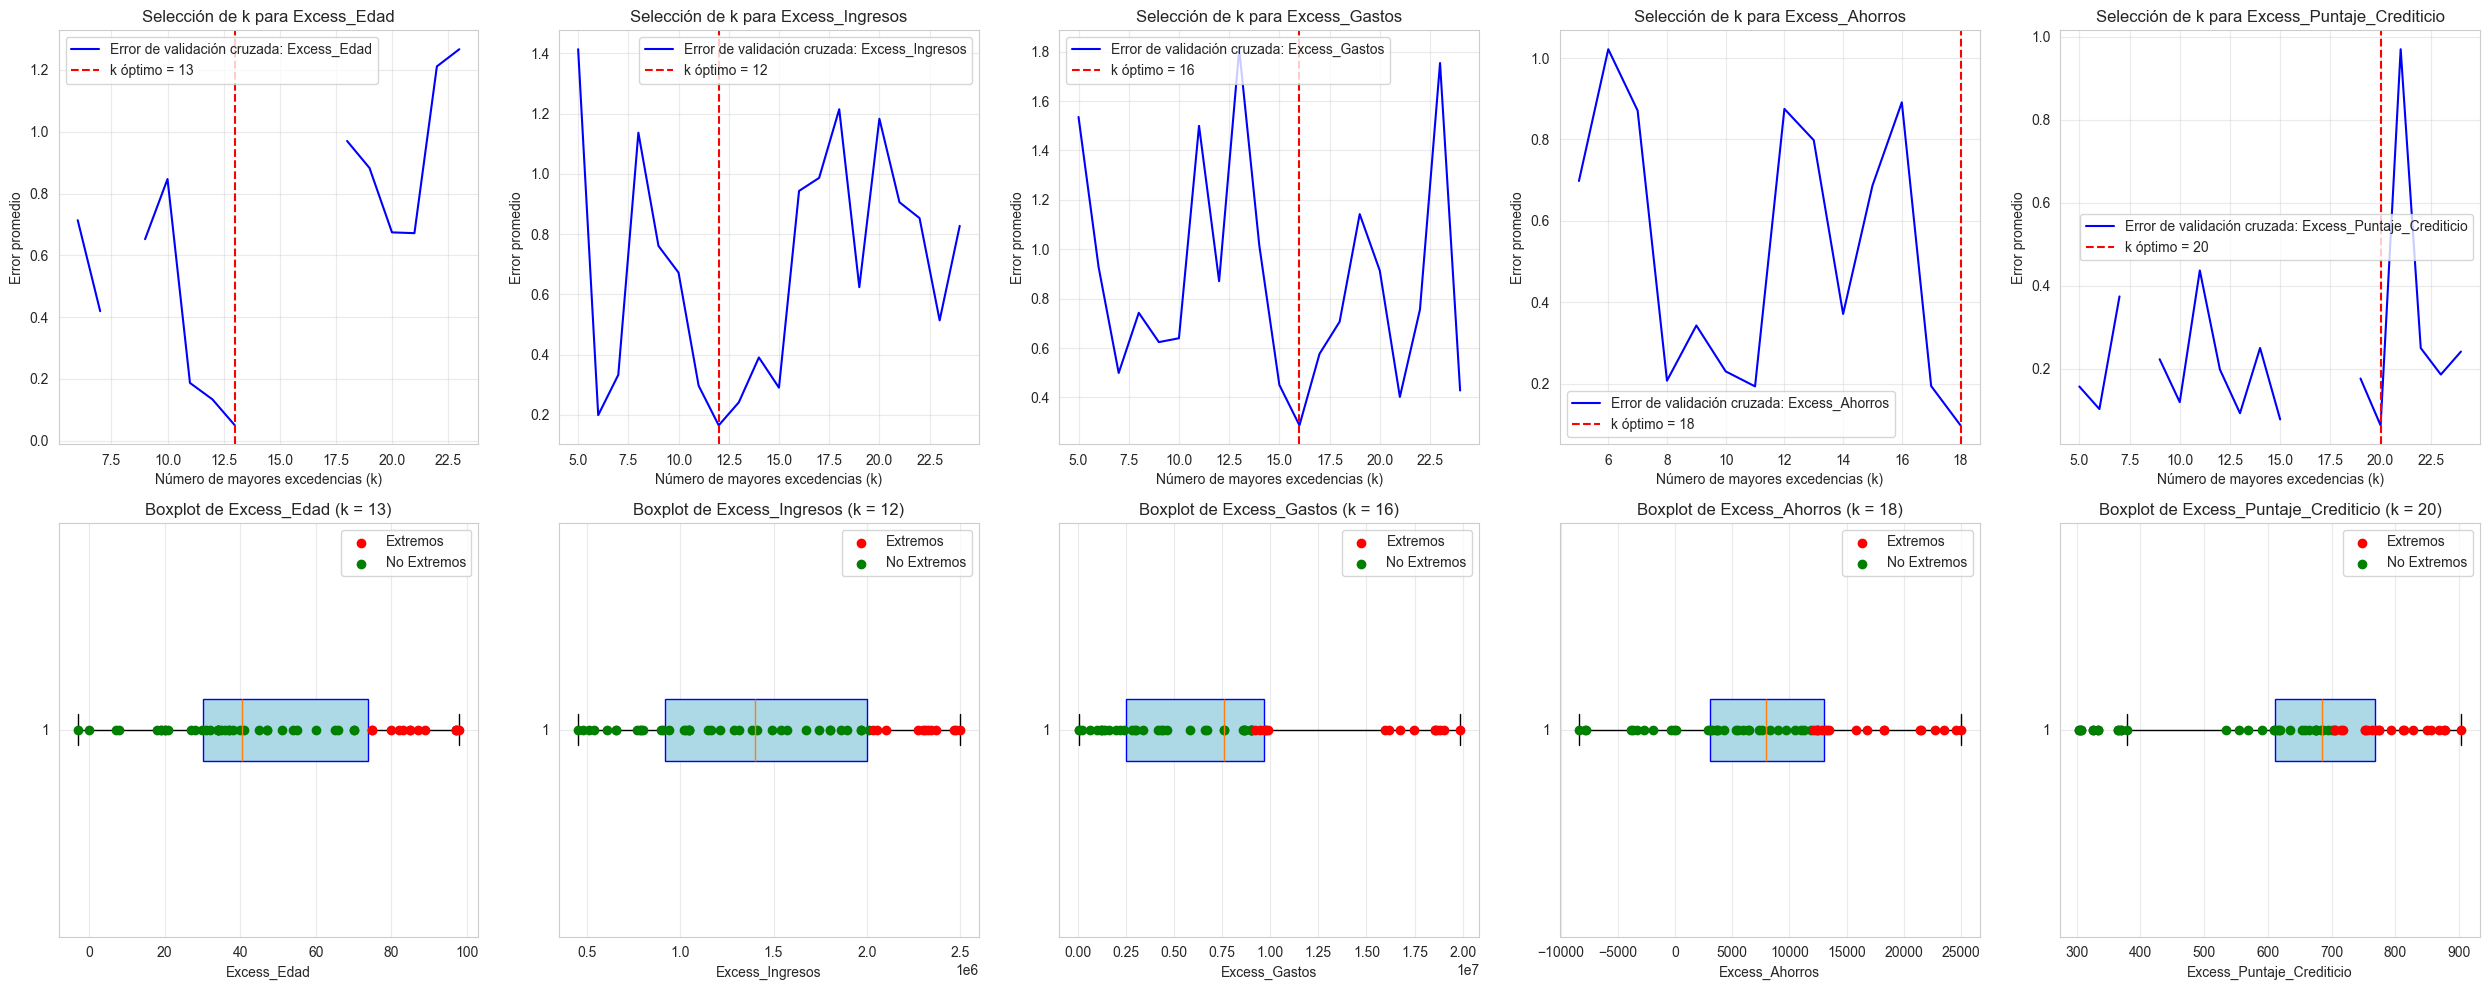

In [39]:


# Función para calcular el Estimador de Hill
def hill_estimator(data, k):
    sorted_data = np.sort(data)[::-1]  # Ordenar en orden descendente
    excess_k = sorted_data[:k] - sorted_data[k]  # Excedencias sobre el umbral
    hill = np.mean(np.log(excess_k / sorted_data[k]))
    return hill

# Validación cruzada para seleccionar k
def cross_validate_hill(data, k_values, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    errors = []
    for k in k_values:
        fold_errors = []
        for train_index, test_index in kf.split(data):
            train_data = data[train_index]
            test_data = data[test_index]
            try:
                hill = hill_estimator(train_data, k)
                sorted_test = np.sort(test_data)[::-1]
                test_k = sorted_test[:k] - sorted_test[k]  # Excedencias en test
                if len(test_k) > 0:
                    predicted = np.mean(np.log(test_k / sorted_test[k]))
                    fold_errors.append(abs(hill - predicted))
            except:
                fold_errors.append(np.nan)  # Para manejar posibles errores numéricos
        errors.append(np.nanmean(fold_errors))  # Promedio de errores por k
    return errors

def find_extremes_with_k(df, k_values=range(5, 50), n_splits=2):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    results = []

    # Configuración de gráficos: 2 filas
    num_columns = len(numeric_columns)
    fig, axes = plt.subplots(2, num_columns, figsize=(5 * num_columns, 10))

    for i, column in enumerate(numeric_columns):
        data_col = df[column].dropna().values

        if len(data_col) < max(k_values):
            print(f"{column}: No hay suficientes datos para calcular el estimador de Hill.")
            continue

        # Validación cruzada
        cv_errors = cross_validate_hill(data_col, k_values, n_splits)

        # Encontrar el k óptimo
        optimal_k = k_values[np.nanargmin(cv_errors)]

        # Identificar extremos
        sorted_data = np.sort(data_col)[::-1]
        extremes = sorted_data[:optimal_k]
        is_extreme = np.isin(data_col, extremes)

        results.append({
            'Variable': column,
            'k óptimo': optimal_k,
            'Extremos': extremes
        })

        # Fila 1: Gráficos de selección de k
        ax_k = axes[0, i]
        ax_k.plot(k_values, cv_errors, label=f'Error de validación cruzada: {column}', color='blue')
        ax_k.axvline(optimal_k, color='red', linestyle='--', label=f'k óptimo = {optimal_k}')
        ax_k.set_xlabel('Número de mayores excedencias (k)', fontsize=10)
        ax_k.set_ylabel('Error promedio', fontsize=10)
        ax_k.set_title(f'Selección de k para {column}', fontsize=12)
        ax_k.legend(fontsize=10)
        ax_k.grid(alpha=0.4)

        # Fila 2: Gráficos de caja
        ax_box = axes[1, i]
        ax_box.boxplot(data_col, vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
        ax_box.scatter(data_col[is_extreme], [1] * np.sum(is_extreme), color='red', label='Extremos', zorder=3)
        ax_box.scatter(data_col[~is_extreme], [1] * np.sum(~is_extreme), color='green', label='No Extremos', zorder=2)
        ax_box.set_title(f'Boxplot de {column} (k = {optimal_k})', fontsize=12)
        ax_box.set_xlabel(column, fontsize=10)
        ax_box.legend(fontsize=10)
        ax_box.grid(alpha=0.4)

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results)
    return results_df

# Aplicar la función al DataFrame extremos
extreme_results_df = find_extremes_with_k(extremos)
